# Word Cloud

In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [2]:
# downloads sample twitter dataset. uncomment the line below if running on a local machine.
nltk.download('twitter_samples')

# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
print(all_positive_tweets)
print(all_negative_tweets)
print(len(all_positive_tweets))
print(len(all_negative_tweets))

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days', '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM', "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI", '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.', 'Jgh , but we have to go to Bayan :D bye', 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katam

In [4]:
def check_func():
  checking_tweet = all_positive_tweets[1234]
  print(checking_tweet)
check_func()

@leomanaids_ look here u little shit :-) I fell asleep &amp; then woke up &amp; thought u were asleep :-) PLUS this was earlier :-) so fuk u dude


In [5]:
import pandas as pd


In [6]:
pos_df = pd.DataFrame(all_positive_tweets)
neg_df = pd.DataFrame(all_negative_tweets)
pos_df.head()
neg_df.head()

,0
0,hopeless for tmr :(
1,Everything in the kids section of IKEA is so c...
2,@Hegelbon That heart sliding into the waste ba...
3,"“@ketchBurning: I hate Japanese call him ""bani..."
4,"Dang starting next week I have ""work"" :("


# Punctuation, Retweet Symbol, Special Characters, URL, Hashtag, LowerCase

In [7]:
pos_df[0] = pos_df[0].str.replace(r'[^\w\s]+', '')
neg_df[0] = neg_df[0].str.replace(r'[^\w\s]+', '')


# Remove retweet text RT
pattern = re.compile(r'^RT[\s]+')
pos_df[0] = [pattern.sub('', x) for x in pos_df[0].tolist()]
neg_df[0] = [pattern.sub('', x) for x in neg_df[0].tolist()]

# Remove URL
pattern = re.compile(r'^RT[\s]+')
pos_df[0] = [pattern.sub('', x) for x in pos_df[0].tolist()]
neg_df[0] = [pattern.sub('', x) for x in neg_df[0].tolist()]

# Remove Hashtag
pattern = re.compile(r'#')
pos_df[0] = [pattern.sub('', x) for x in pos_df[0].tolist()]
neg_df[0] = [pattern.sub('', x) for x in neg_df[0].tolist()]

#Lowercase
pos_df[0] = pos_df[0].str.lower()
neg_df[0] = neg_df[0].str.lower()

pos_df.head()
neg_df.head()

,0
0,hopeless for tmr
1,everything in the kids section of ikea is so c...
2,hegelbon that heart sliding into the waste bas...
3,ketchburning i hate japanese call him bani \n...
4,dang starting next week i have work


# Stopwords

In [8]:
STOPWORDS = set(stopwords.words('english'))
# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# Applying the stopwords to 'text_punct' and store into 'text_stop'
pos_df[0] = pos_df[0].apply(stopwords)
neg_df[0] = neg_df[0].apply(stopwords)

pos_df.head()
neg_df.head()

,0
0,hopeless tmr
1,everything kids section ikea cute shame im nea...
2,hegelbon heart sliding waste basket
3,ketchburning hate japanese call bani
4,dang starting next week work


# Remove Emoji

In [9]:
# Function to remove emoji.
def remove_emoji(string):
  emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', string)

pos_df[0] = pos_df[0].apply(remove_emoji)
neg_df[0] = neg_df[0].apply(remove_emoji)

pos_df.head()
neg_df.head()

,0
0,hopeless tmr
1,everything kids section ikea cute shame im nea...
2,hegelbon heart sliding waste basket
3,ketchburning hate japanese call bani
4,dang starting next week work


# Porter Stemming

In [10]:
Pstemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [Pstemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

pos_df['tweet_stem'] = pos_df[0].apply(stem_sentences)
#pos_df = pos_df.drop(columns=[0]) # Get rid of the unstemmed column.
neg_df['tweet_stem'] = neg_df[0].apply(stem_sentences)
#neg_df = neg_df.drop(columns=[0]) # Get rid of the unstemmed column.

pos_df.head()
neg_df.head()

,0,tweet_stem
0,hopeless tmr,hopeless tmr
1,everything kids section ikea cute shame im nea...,everyth kid section ikea cute shame im nearli ...
2,hegelbon heart sliding waste basket,hegelbon heart slide wast basket
3,ketchburning hate japanese call bani,ketchburn hate japanes call bani
4,dang starting next week work,dang start next week work


In [11]:
neg_df['polarity']=0
pos_df['polarity']=1
pos_df.head()

,0,tweet_stem,polarity
0,followfriday france_inte pkuchly57 milipol_par...,followfriday france_int pkuchly57 milipol_pari...,1
1,lamb2ja hey james odd please call contact cent...,lamb2ja hey jame odd pleas call contact centr ...,1
2,despiteofficial listen last night bleed amazin...,despiteoffici listen last night bleed amaz tra...,1
3,97sides congrats,97side congrat,1
4,yeaaaah yippppy accnt verified rqst succeed go...,yeaaaah yippppi accnt verifi rqst succeed got ...,1


**Create one dataset**

In [12]:
df = pd.DataFrame()
df = df.append(pos_df)
df = df.append(neg_df)
print(df.shape)
df.head()

(10000, 3)


,0,tweet_stem,polarity
0,followfriday france_inte pkuchly57 milipol_par...,followfriday france_int pkuchly57 milipol_pari...,1
1,lamb2ja hey james odd please call contact cent...,lamb2ja hey jame odd pleas call contact centr ...,1
2,despiteofficial listen last night bleed amazin...,despiteoffici listen last night bleed amaz tra...,1
3,97sides congrats,97side congrat,1
4,yeaaaah yippppy accnt verified rqst succeed go...,yeaaaah yippppi accnt verifi rqst succeed got ...,1


In [13]:
from wordcloud import WordCloud

## Total Cloud

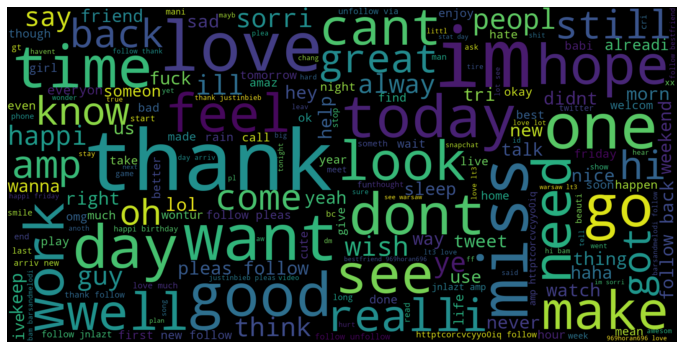

In [14]:
total_string = []
for t in df.tweet_stem:
    total_string.append(t)
total_string = pd.Series(total_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(total_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Positive Cloud

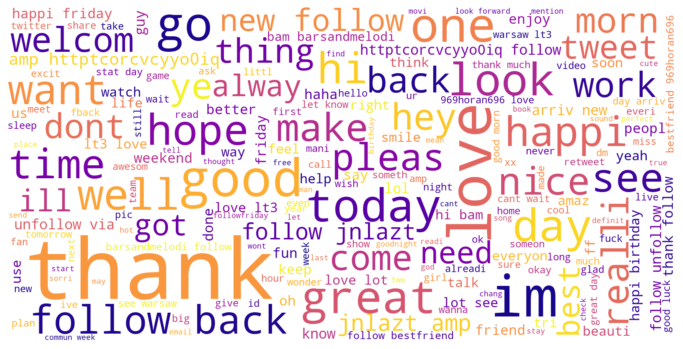

In [18]:
pos_tweets = df[df.polarity == 1]
pos_string = []
for t in pos_tweets.tweet_stem:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='plasma', background_color='white').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Negative Cloud

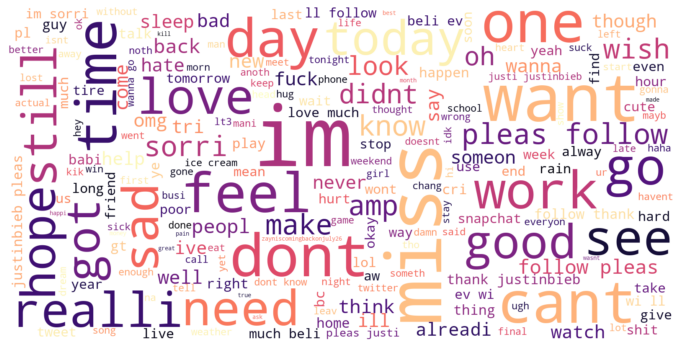

In [19]:
neg_tweets = df[df.polarity == 0]
neg_string = []
for t in neg_tweets.tweet_stem:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma', background_color='white').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()